In [1]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

(592, 592, 3)


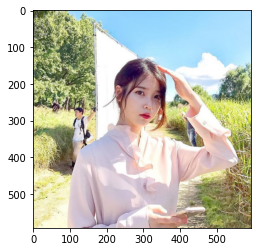

In [3]:
# 본인이 선택한 이미지의 경로에 맞게 바꿔 주세요.
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_image.png'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file)


('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7fd5185dcdf0>)

In [5]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [6]:
segvalues, output = model.segmentAsPascalvoc(img_path)

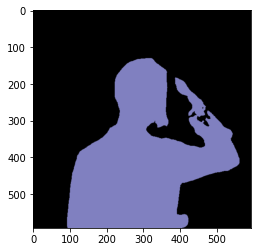

In [7]:
plt.imshow(output)
plt.show()

In [8]:
segvalues

{'class_ids': array([ 0, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [10]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

In [11]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


In [12]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [13]:
colormap[15]

array([192, 128, 128])

In [14]:
seg_color = (128,128,192)

(592, 592)


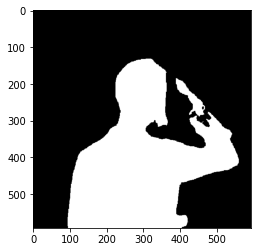

In [15]:
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

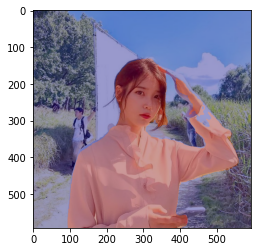

In [16]:
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

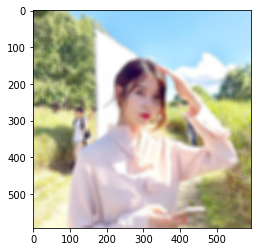

In [18]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (13,13))  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

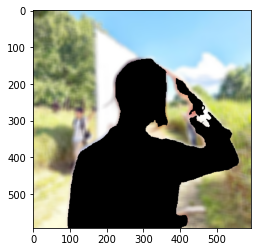

In [19]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

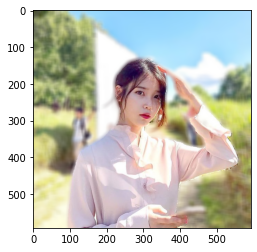

In [20]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

## 실전 파트

### step1 인물모드 직접해보기

In [2]:
# 1-1) 파일/ 모델경로 지정
img_path1 = os.getenv('HOME')+'/aiffel/human_segmentation/images/benzema.jpg'
img_path2 = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_dog.jpg'  
img_path3 = os.getenv('HOME')+'/aiffel/human_segmentation/images/iu.jpg'
img_orig1 = cv2.imread(img_path1)
img_orig2 = cv2.imread(img_path2)
img_orig3 = cv2.imread(img_path3) 

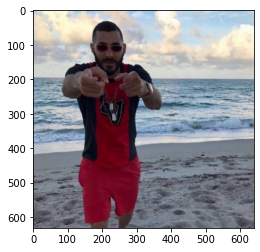

In [7]:
plt.imshow(cv2.cvtColor(img_orig1, cv2.COLOR_BGR2RGB))
plt.show()

In [8]:
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

In [9]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [12]:
# 1-2) 세그멘트 분리
segvalues1, output1 = model.segmentAsPascalvoc(img_path1)
segvalues2, output2 = model.segmentAsPascalvoc(img_path2)
segvalues3, output3 = model.segmentAsPascalvoc(img_path3)

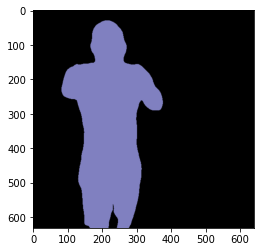

In [13]:
plt.imshow(output1)
plt.show()

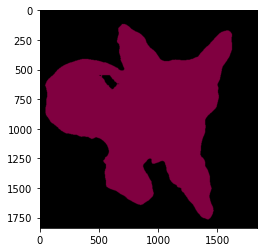

In [14]:
plt.imshow(output2)
plt.show()

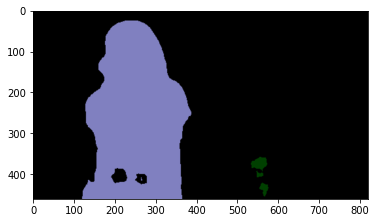

In [15]:
plt.imshow(output3)
plt.show()

In [17]:
# 강아지도 잘 구분되었는지, 정체불명 초록색이 뭔지 확인해보자
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
for class_id in segvalues2['class_ids']:
    print(LABEL_NAMES[class_id]) 

background
dog


In [18]:
for class_id in segvalues3['class_ids']:
    print(LABEL_NAMES[class_id]) 
#강아지도 잘 구분, 화분까지 분리해낸것을 확인했다.

background
person
pottedplant


In [19]:
#구분 색깔을 찾아보자
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [21]:
colormap[12] #강아지

array([ 64,   0, 128])

In [22]:
colormap[15] #사람

array([192, 128, 128])

In [27]:
# 강아지는 RGB [126, 0 , 64]  사람은 RGB [128, 128, 192]
seg_dog = (128, 0, 64)
seg_people = (128, 128, 192)

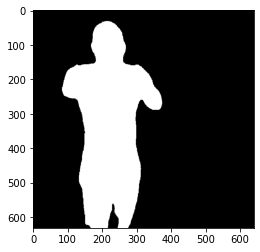

In [29]:
#1-3) 마스크 제작
seg_map1 = np.all(output1==seg_people, axis=-1)
plt.imshow(seg_map1, cmap='gray')
plt.show()

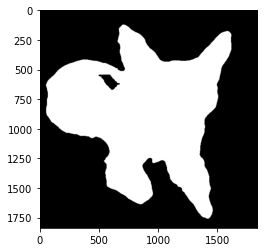

In [30]:
seg_map2 = np.all(output2==seg_dog, axis=-1)
plt.imshow(seg_map2, cmap='gray')
plt.show()

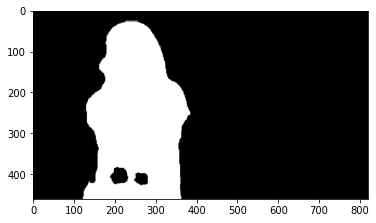

In [31]:
seg_map3 = np.all(output3==seg_people, axis=-1)
plt.imshow(seg_map3, cmap='gray')
plt.show()

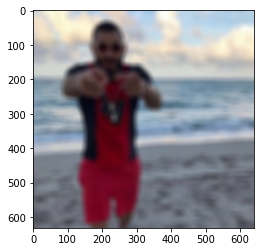

In [50]:
#1-4)배경 블러처리
img_orig1_blur = cv2.blur(img_orig1, (20,20))  
plt.imshow(cv2.cvtColor(img_orig1_blur, cv2.COLOR_BGR2RGB))
plt.show()

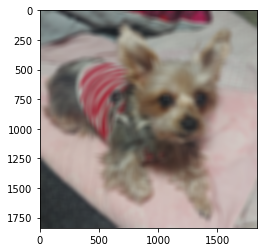

In [54]:
img_orig2_blur = cv2.blur(img_orig2, (50,50))  
plt.imshow(cv2.cvtColor(img_orig2_blur, cv2.COLOR_BGR2RGB))
plt.show()
# 해상도가 높은 사진은 더 많은 픽셀에 블러처리가 필요한듯하다

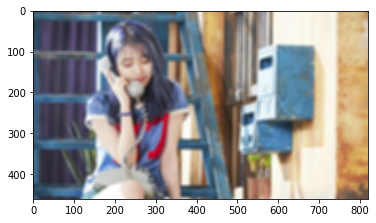

In [39]:
img_orig3_blur = cv2.blur(img_orig3, (10,10))  
plt.imshow(cv2.cvtColor(img_orig3_blur, cv2.COLOR_BGR2RGB))
plt.show()

In [51]:
# 배경 블러처리한 것 마스크를 만들자
img_mask1 = seg_map1.astype(np.uint8) * 255
img_mask2 = seg_map2.astype(np.uint8) * 255
img_mask3 = seg_map3.astype(np.uint8) * 255

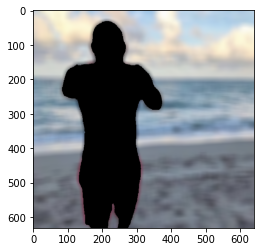

In [52]:
img_mask1_color = cv2.cvtColor(img_mask1, cv2.COLOR_GRAY2BGR)
img_bg_mask1 = cv2.bitwise_not(img_mask1_color)
img_bg_blur1 = cv2.bitwise_and(img_orig1_blur, img_bg_mask1)
plt.imshow(cv2.cvtColor(img_bg_blur1, cv2.COLOR_BGR2RGB))
plt.show()

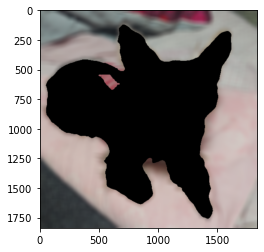

In [55]:
img_mask2_color = cv2.cvtColor(img_mask2, cv2.COLOR_GRAY2BGR)
img_bg_mask2 = cv2.bitwise_not(img_mask2_color)
img_bg_blur2 = cv2.bitwise_and(img_orig2_blur, img_bg_mask2)
plt.imshow(cv2.cvtColor(img_bg_blur2, cv2.COLOR_BGR2RGB))
plt.show()

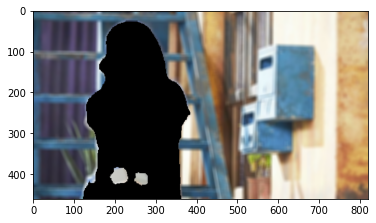

In [44]:
img_mask3_color = cv2.cvtColor(img_mask3, cv2.COLOR_GRAY2BGR)
img_bg_mask3 = cv2.bitwise_not(img_mask3_color)
img_bg_blur3 = cv2.bitwise_and(img_orig3_blur, img_bg_mask3)
plt.imshow(cv2.cvtColor(img_bg_blur3, cv2.COLOR_BGR2RGB))
plt.show()

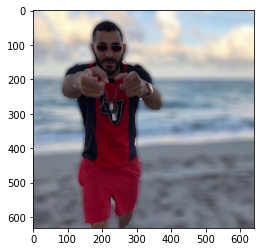

In [53]:
# 블러처리 배경 + 원본 합치기
img_concat1 = np.where(img_mask1_color==255, img_orig1, img_bg_blur1)
plt.imshow(cv2.cvtColor(img_concat1, cv2.COLOR_BGR2RGB))
plt.show()

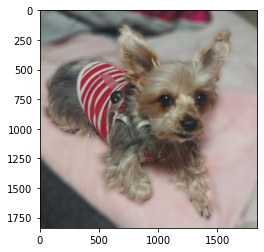

In [56]:
img_concat2 = np.where(img_mask2_color==255, img_orig2, img_bg_blur2)
plt.imshow(cv2.cvtColor(img_concat2, cv2.COLOR_BGR2RGB))
plt.show()

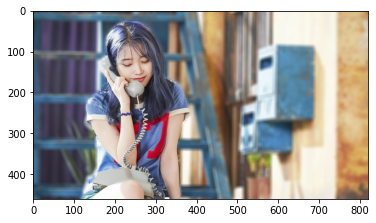

In [48]:
img_concat3 = np.where(img_mask3_color==255, img_orig3, img_bg_blur3)
plt.imshow(cv2.cvtColor(img_concat3, cv2.COLOR_BGR2RGB))
plt.show()

In [58]:
# 크로마키 실험해보기
img_path_bgr = os.getenv('HOME')+'/aiffel/human_segmentation/images/bgr.jpg'
img_orig_bgr = cv2.imread(img_path_bgr)

In [63]:
from PIL import Image

In [64]:
img_bgr = Image.open(img_path_bgr)

In [67]:
crop_img_bgr = img_bgr.crop((0,0,820,461))

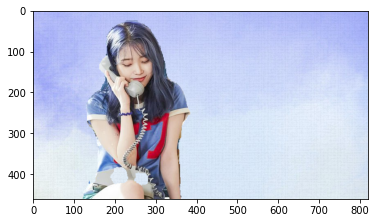

In [68]:
img_concat_bgr = np.where(img_mask3_color==255, img_orig3, crop_img_bgr)
plt.imshow(cv2.cvtColor(img_concat_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### Step2 사진에서 문제점 찾기

1번 사진은 디지털 열화가 좀 심한 사진이라 좀걱정했지만, 예상한대로 이미지가 왜곡되면서 
사진이 전달하고자 하는 바를 더 명확하게 전달할 수 있었던거 같다. 강조효과도 줄수있음 더 좋을텐데 ~~그건 포토샵으로~~
 
2번 사진의 경우 해상도가 높은사진인데다, 피사체와 배경사이의 거리가 그다지 멀지 않아서
블러효과가 크게 부각되거나 하진 않았다. 다른 문제라면 강아지가 입고있는 옷이 일반적인 강아지들한테는 볼수없는 패턴과 색을 가지고 있어서 일부분이 블러처리가 되는 문제가 발생하였다.

3번 사진은 마찬가지로 사람은 잘 파악했으나, 무릎 위에있는 수첩(?)을 사람과 별도로 분리, 또 전화기는 사람의 일부로 인식하여 블러처리를 해서
겉보기엔 크게 문제없어보이나 자세히 보면 아쉬움이 좀 남는다.
크로마키처럼 한 경우 사진 중간에(수첩위치에 해당) 바람구멍이 나있는것을 확인할 수 있다.

기본적으로 블러효과로 인해 테두리부분이 자연스럽게 뭉개지지않고 누끼가 깔끔하게 따지지 않는 문제들을 가지고 있다.

### Step3 해결방법을 제안해보기

Semantic segmentation은 결과적으로는 통계적 방법을 통해 대상을 구분하는 유용한 기술이나, 통계적 방법의 한계로 50% 정확도에서 80%의 정확도를 올리거나 80%에서 90%의 정확도를 올리는 것은 어느정도 쉬울수 있으나, 더 정교함을 만들기 위해서는 지수적으로 난이도가 증가할수밖에 없다.

따라서 어느정도 정확도가 답보된 이후에는 통계적인 정확도를 높이려는 시도보다는, 기존의 포토샵 등에서 사용하고 있는 연역적인 방법이나 사용자의 보정에 맡기는 방식을 혼합해서 사용하는것이 바람직하다고 생각된다.

### 1)Semantic segmentation을 통해 마스크의 테두리를 정한다
 - 사실 굳이 Semantic일 필요가 있나 고민이되긴한다. 사진에서 중요한건 배경 / 피사체만 구분하면 되기 때문에...
 - 아무튼 배경만 확실히 파악할 수 있으면 피사체의 대략적인 테두리를 정할 수 있을 것이다.
 
### 2)테두리 외곽이 정해지면 외곽의 픽셀값과 인접한 픽셀 한 두칸 정도의 유사도를 파악해 테두리를 조정
 - 실제로 포토샵에서 누끼딸 때 사용하는 매직봉도구의 매커니즘을 적용하면 좋을꺼같음
   (매직봉 도구로 지정한 픽셀과 유사한 색을 가지는 집단을 알아서 그룹화 해줌)
 
### 3)가중치정하기, 직접 수정, undo 등을 활용해 사용자가 직접 가볍게 편집할 수 있도록 도와주는 UI가 있다면 더 좋을꺼 같음
 - 단순히 그냥 묻지도 따지지도 않고 한픽셀씩 감소/증가시키기 등의 방식으로 사용자가 피드백을 바로 받을 수 있다면, 사람이 그중 가장 자연스러운 것을 선택하도록 하는 방식으로 우회도 가능
 - 경우에 따라 선택지를 주는것이 최선이겠지만, 마스크 테두리 내부는 기본적으로 꽉 채우도록 했으면 좋겠다.

 사족인거 같지만, 개인적인 의견으로, 아웃포커스와 같은 사진 촬영 기법은 예술이나 감성의 영역에 가깝기 때문에 기술로 감성을 담아내기 충분한가 하는 의구심이 들기도 한다. 너도 나도 아웃포커스 사진을 사용하면, 그 유니크한 광원과 포커스가 만들어내는 찰나의 순간이 가지는 인문학적? 예술적 영역을 자연스럽게 살릴 수 있을까 하는 생각도 들고... 한 100장쯤 일반사진으로 찍다가 1장 아웃포커스로 찍은 사진이 의미있는거기 때문에 시장에서 먹힐 아이템인가 하면 그것도 아닌거 같다. 유행이되면... 가치가 희석되는 케이스.
 
오히려 배경을 삭제해주는 (누끼따기) 것은 아직도 많은 포토샵 디자이너의 주업무기도해서 수요가 있을지도 모르겠다.
(실제로 현재 포토샵에는 알아서 피사체 찾아주는 AI가 적용되고 있는것으로 알고있음, 물론 정확도가 떨어져서 손으로 다시 수정해야하지만..)

그렇지만 Semantic segmentation이 활용될 여지가 있는 분야는 아주 많다고 생각한다.

가장 산업하고 연관될만한 것을 고민해보니 제일먼저 떠오르는 것음
아무래도 군사분야서 적 / 아군 피아식별 해주는 것이 엄청나게 부가가치를 창출할 것이라고 예상은 되지만, 이미 미국에서는 다 적용하고 있을것만 같다. 자율주행도 열심히 연구되고 있는 분야이고, 시각장애인들을 위한 가이드로봇같은거도 만들수 있을꺼 같고, 고민해볼 거리가 많은 분야인거 같다.